<a href="https://colab.research.google.com/github/RushilPatel0703/ACML_Project/blob/main/ACML_Project_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import rcParams
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
# for importing data that is already on github
url = 'https://raw.githubusercontent.com/RushilPatel0703/ACML_Project/main/data.csv'
data = pd.read_csv(url)

In [3]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
X = data.drop('Bankrupt?',axis=1)
y = data['Bankrupt?']

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [6]:
#to get the important features and unimportant features
features = RandomForestClassifier(n_estimators = 150) 

In [7]:
features.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [8]:
y_pred = features.predict(X_test)

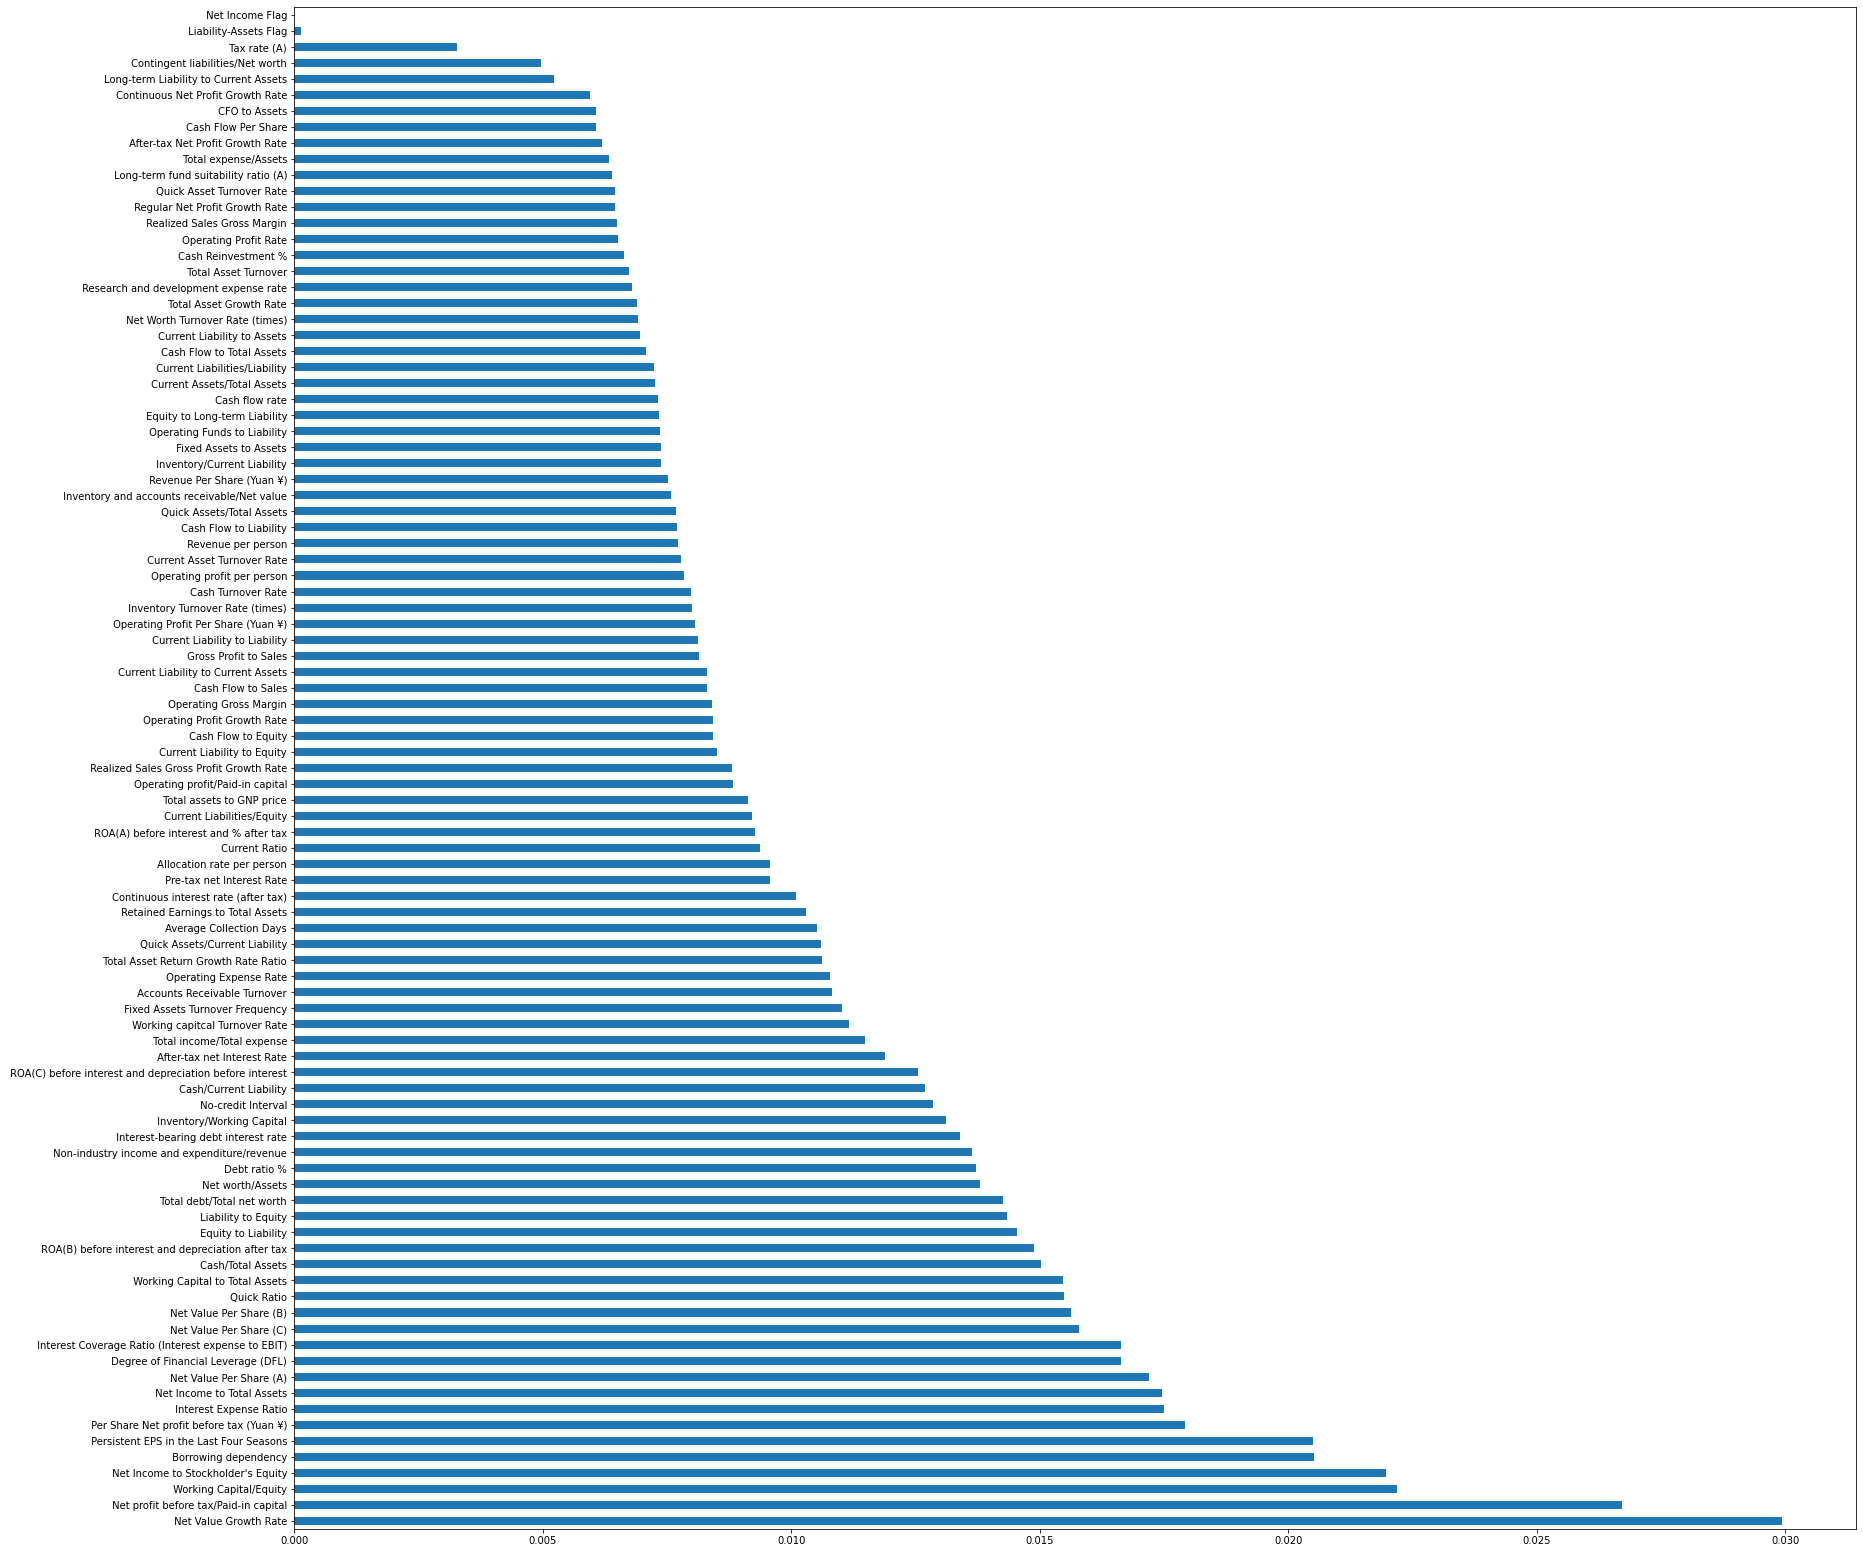

In [12]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
feature_imp = pd.Series(features.feature_importances_, index = data.columns[1:]).sort_values(ascending = False)
feature_imp.plot(kind='barh')
plt.rcParams["figure.figsize"] = (28,28)

In [10]:
#From the above graph we can see the features that contribute the least to our model and those features will be removed
#new_data = data.drop('Bankrupt?',axis=1)
#feature_imp[:33]

In [11]:
new_data = data[' Net Value Growth Rate',
                ' Borrowing dependency',
                ' Persistent EPS in the Last Four Seasons',
                ' Cash/Total Assets',
                ' Net profit before tax/Paid-in capital',
                ' Non-industry income and expenditure/revenue',
                ' Net worth/Assets','Equity to Liability',
                ' Total debt/Total net worth',
                ' Degree of Financial Leverage (DFL)',
                ' Fixed Assets Turnover Frequency',
                ' Interest Expense Ratio',
                ' Cash/Current Liability',
                ' Interest Coverage Ratio (Interest expense to EBIT)',
                ' Inventory/Working Capital',
                ' Debt ratio %',
                ' Net Income to Total Assets',
                ' Interest-bearing debt interest rate',
                ' Working Capital/Equity',
                ' Working Capital to Total Assets',
                ' Net Value Per Share (A)',
                ' Net Value Per Share (C)',
                ' Continuous interest rate (after tax)',
                ' ROA(B) before interest and depreciation after tax',
                ' Accounts Receivable Turnover',' Net Value Per Share (B)',
                ' Total Asset Return Growth Rate Ratio',
                ' Per Share Net profit before tax (Yuan ¥)',
                ' Quick Ratio',
                ' Operating Expense Rate',
                ' No-credit Interval',
                ' ROA(C) before interest and depreciation before interest']

KeyError: ignored

### Random Forest Classifier Parameter tuning

In [16]:
accuracy1 = []
accuracy2 = []
accuracy3 = []
accuracy4 = []
accuracy5 = []
accuracy6 = []
accuracy7 = []
estimators = [10,50,60,90,100,150,200,250,300,400]

In [17]:
for i in range(0,10):
    clf_loop1 = RandomForestClassifier(n_estimators = estimators[i])
    clf_loop1.fit(X_train, y_train)
    y_pred_loop1 = clf_loop1.predict(X_test)
    accuracy1.append(metrics.accuracy_score(y_test, y_pred_loop1)*100)

for i in range(0,10):
    clf_loop2 = RandomForestClassifier(n_estimators = estimators[i],criterion='entropy')
    clf_loop2.fit(X_train, y_train)
    y_pred_loop2 = clf_loop2.predict(X_test)
    accuracy2.append(metrics.accuracy_score(y_test, y_pred_loop2)*100)

for i in range(0,10):
    clf_loop3 = RandomForestClassifier(n_estimators = estimators[i],criterion='entropy',max_features='sqrt')
    clf_loop3.fit(X_train, y_train)
    y_pred_loop3 = clf_loop3.predict(X_test)
    accuracy3.append(metrics.accuracy_score(y_test, y_pred_loop3)*100)

for i in range(0,10):
    clf_loop4 = RandomForestClassifier(n_estimators = estimators[i],criterion='gini')
    clf_loop4.fit(X_train, y_train)
    y_pred_loop4 = clf_loop4.predict(X_test)
    accuracy4.append(metrics.accuracy_score(y_test, y_pred_loop4)*100)

for i in range(0,10):
    clf_loop5 = RandomForestClassifier(n_estimators = estimators[i],criterion='gini',max_features='sqrt')
    clf_loop5.fit(X_train, y_train)
    y_pred_loop5 = clf_loop5.predict(X_test)
    accuracy5.append(metrics.accuracy_score(y_test, y_pred_loop5)*100)

for i in range(0,10):
    clf_loop6 = RandomForestClassifier(n_estimators = estimators[i],criterion='gini',max_features='log2')
    clf_loop6.fit(X_train, y_train)
    y_pred_loop6 = clf_loop6.predict(X_test)
    accuracy6.append(metrics.accuracy_score(y_test, y_pred_loop6)*100)

for i in range(0,10):
    clf_loop7 = RandomForestClassifier(n_estimators = estimators[i],criterion='entropy',max_features='log2')
    clf_loop7.fit(X_train, y_train)
    y_pred_loop7 = clf_loop7.predict(X_test)
    accuracy7.append(metrics.accuracy_score(y_test, y_pred_loop7)*100)        

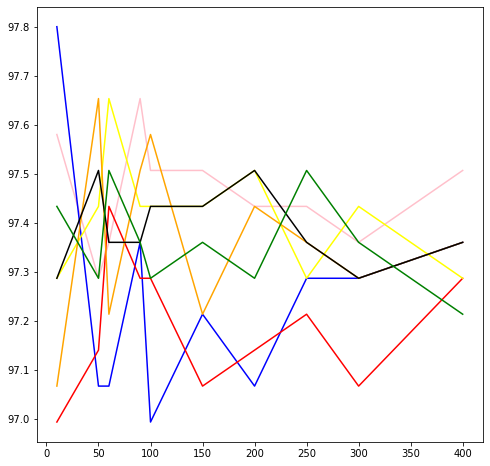

In [26]:
plt.plot(estimators,accuracy1,color='pink')
plt.plot(estimators,accuracy2,color='blue')
plt.plot(estimators,accuracy3,color='red')
plt.plot(estimators,accuracy4,color='yellow')
plt.plot(estimators,accuracy5,color='orange')
plt.plot(estimators,accuracy6,color='black')
plt.plot(estimators,accuracy7,color='green')

### Naive Bayes parameter tuning

In [19]:
alphas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
variables = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
predictions1=[]
predictions2=[]

In [20]:
sc_X = StandardScaler() 
X_trainNb = sc_X.fit_transform(X_train)
X_testNb = sc_X.fit_transform(X_test)

In [21]:
for i in range(0,10):
    Bnb_classifier = BernoulliNB(alpha=alphas[i],fit_prior=True)
    Bnb_classifier.fit(X_trainNb, y_train)
    y_predBnb = Bnb_classifier.predict(X_testNb)
    predictions1.append(metrics.accuracy_score(y_test, y_predBnb)*100)

for i in range(0,10):
    Gnb_classifier = GaussianNB(var_smoothing = variables[i])
    Gnb_classifier.fit(X_trainNb, y_train)
    y_predGnb = Gnb_classifier.predict(X_testNb)
    predictions2.append(metrics.accuracy_score(y_test, y_predGnb)*100)

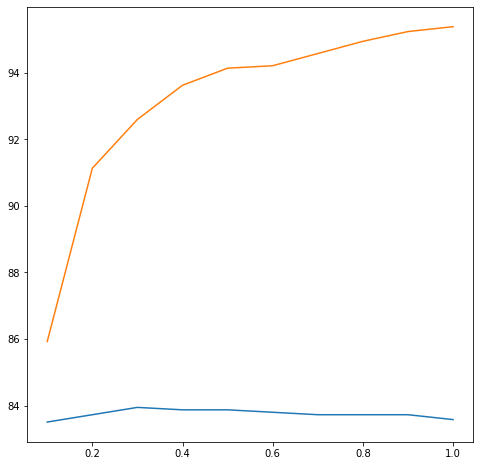

In [27]:
plt.plot(alphas,predictions1)
plt.plot(variables,predictions2)
plt.rcParams["figure.figsize"] = (8,8)

In [23]:
iterations = [100,150,200,300,400,700]
acc1 = []
acc2 = []
acc3 = []
acc4 = []

In [24]:
for i in range(0,6):
    lrmodel1 = LogisticRegression(penalty ='l2',C = 0.1, solver='lbfgs',max_iter=iterations[i])
    lrmodel1.fit(X_trainNb, y_train)
    y_predLR1 = lrmodel1.predict(X_testNb)
    acc1.append(metrics.accuracy_score(y_test, y_predLR1)*100)

for i in range(0,6):
    lrmodel2 = LogisticRegression(penalty ='l2',C = 0.1, solver='liblinear',max_iter=iterations[i])
    lrmodel2.fit(X_trainNb, y_train)
    y_predLR2 = lrmodel2.predict(X_testNb)
    acc2.append(metrics.accuracy_score(y_test, y_predLR2)*100)

for i in range(0,6):
    lrmodel3 = LogisticRegression(penalty ='l2',C = 1, solver='saga',max_iter=iterations[i])
    lrmodel3.fit(X_trainNb, y_train)
    y_predLR3 = lrmodel3.predict(X_testNb)
    acc3.append(metrics.accuracy_score(y_test, y_predLR3)*100)

for i in range(0,6):
    lrmodel4 = LogisticRegression(penalty ='l2',C = 0.001, solver='newton-cg',max_iter=iterations[i])
    lrmodel4.fit(X_trainNb, y_train)
    y_predLR4 = lrmodel4.predict(X_testNb)
    acc4.append(metrics.accuracy_score(y_test, y_predLR4)*100)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

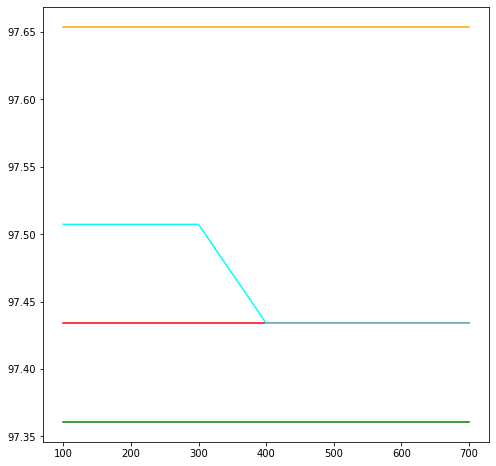

In [25]:
plt.plot(iterations,acc1, color='red')
plt.plot(iterations,acc2, color='green')
plt.plot(iterations,acc3, color='aqua')
plt.plot(iterations,acc4, color='orange')